In [1]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np

# set font
import matplotlib as mpl

# for Mac
mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
# mpl.rc('font',family='MS Gothic')


In [2]:
# import data to geopandas (gpd)
naganomesh1 = gpd.read_file('data/SDDSWS5437')
naganomesh2 = gpd.read_file('data/SDDSWS5438')
naganomesh3 = gpd.read_file('data/SDDSWS5337')
naganomesh4 = gpd.read_file('data/SDDSWS5338')


In [3]:
# combine all four mesh shapes
naganomesh = gpd.pd.concat([naganomesh1,naganomesh2,naganomesh3,naganomesh4])

<Axes: >

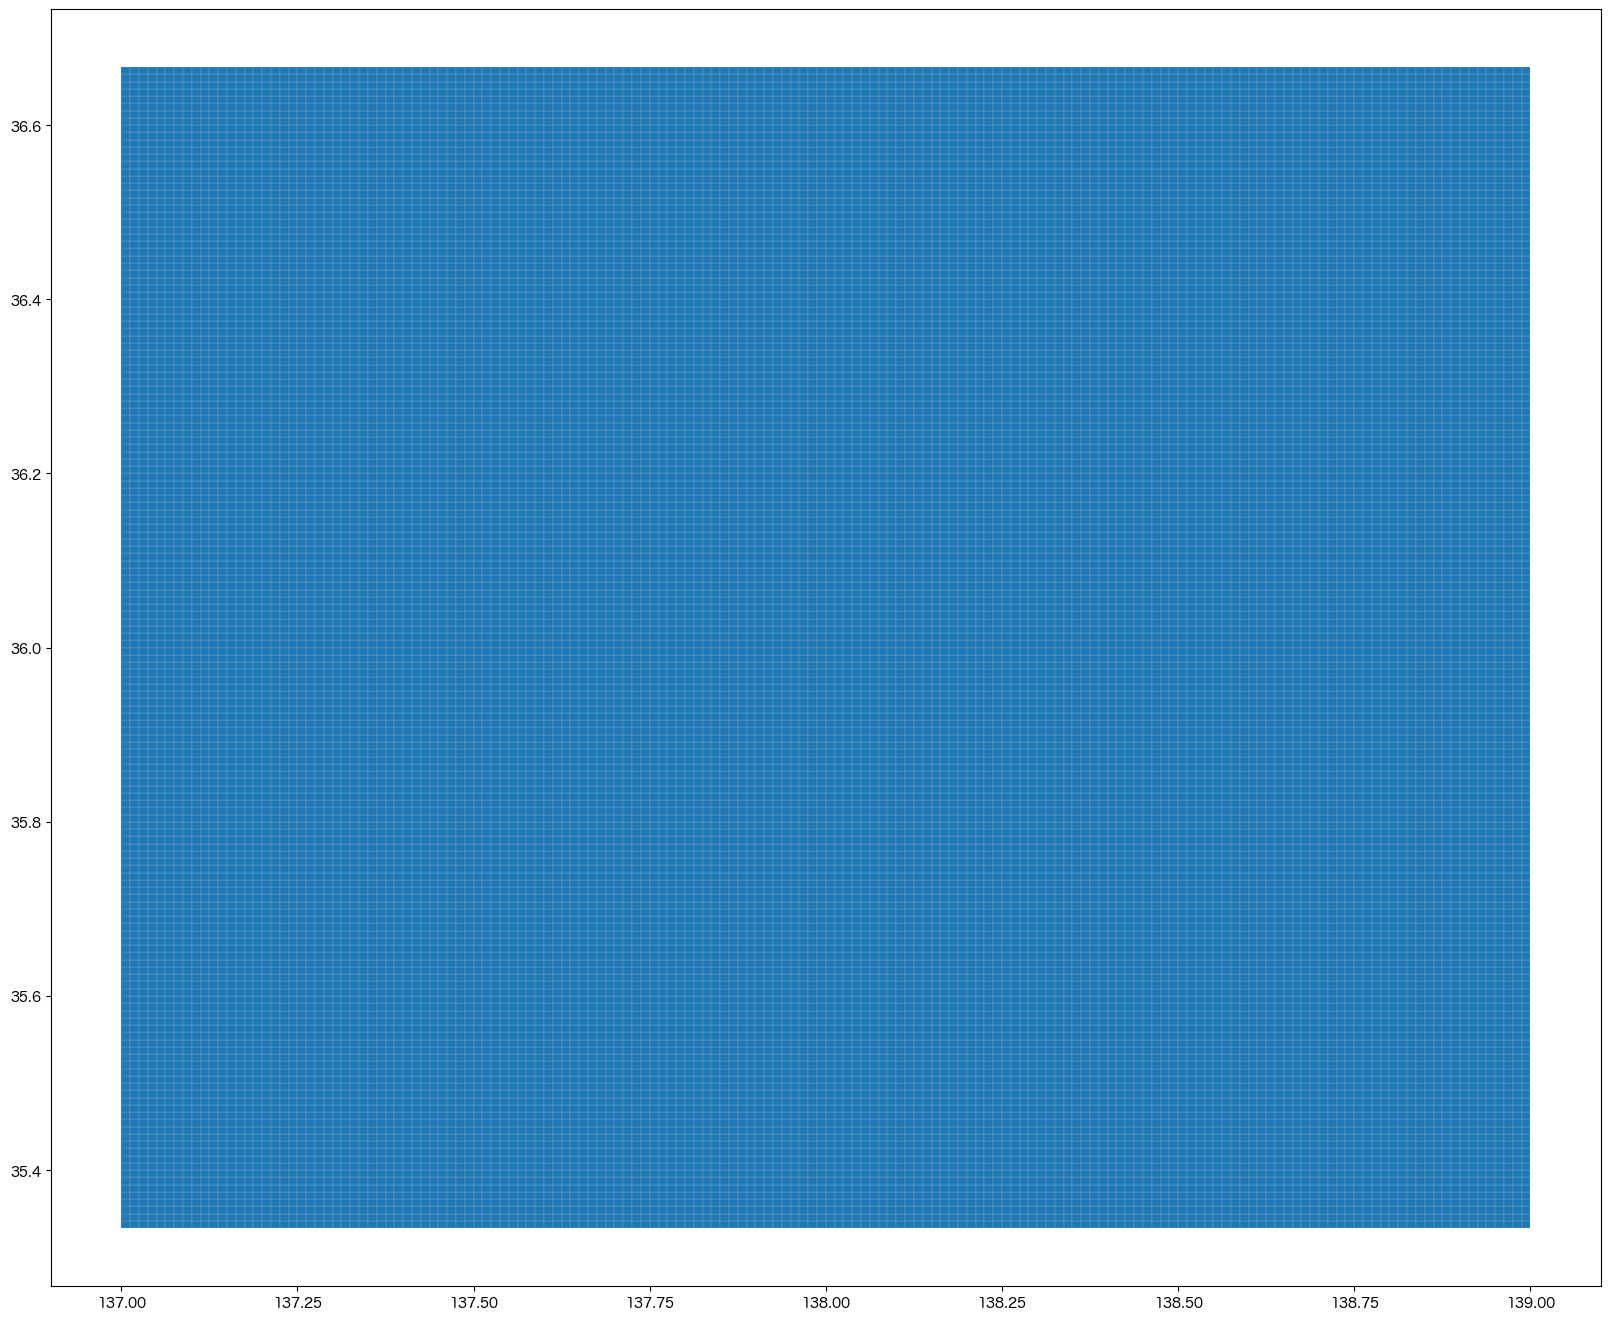

In [4]:
# quick plot
naganomesh.plot(figsize=(20,20),edgecolor='white',linewidth=0.1)

In [5]:
naganomesh.head()

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry
0,54370000,5437,00,00,1,"POLYGON ((137.01250 36.00000, 137.00000 36.000..."
1,54370001,5437,00,01,2,"POLYGON ((137.02500 36.00000, 137.01250 36.000..."
2,54370002,5437,00,02,3,"POLYGON ((137.03750 36.00000, 137.02500 36.000..."
3,54370003,5437,00,03,4,"POLYGON ((137.05000 36.00000, 137.03750 36.000..."
4,54370004,5437,00,04,5,"POLYGON ((137.06250 36.00000, 137.05000 36.000..."


In [6]:
# imort csv data to pandas (pd) 
#  encoding='cp932' 
naganodata1 = pd.read_csv('data/tblT001100S5437.txt', encoding='cp932')
naganodata4 = pd.read_csv('data/tblT001100S5438.txt', encoding='cp932')
naganodata2 = pd.read_csv('data/tblT001100S5337.txt', encoding='cp932')
naganodata3 = pd.read_csv('data/tblT001100S5338.txt', encoding='cp932')

In [7]:
# check data
naganodata1.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
0,NaN,NaN,NaN,NaN,人口（総数）,人口（総数） 男,人口（総数） 女,０～１４歳人口 総数,０～１４歳人口 男,０～１４歳人口 女,...,６人世帯数 一般世帯数,７人以上世帯数 一般世帯数,親族のみの世帯数 一般世帯数,核家族世帯数 一般世帯数,核家族以外の世帯数 一般世帯数,６歳未満世帯員のいる世帯数 一般世帯数,６５歳以上世帯員のいる世帯数 一般世帯数,世帯主の年齢が２０～２９歳の１人世帯数 一般世帯数,高齢単身世帯数 一般世帯数,高齢夫婦世帯数 一般世帯数
1,54370000.0,2.0,54370072.0,NaN,6,3,3,*,*,*,...,*,*,*,*,*,*,*,*,*,*
2,54370004.0,2.0,54370072.0,NaN,2,1,1,*,*,*,...,*,*,*,*,*,*,*,*,*,*
3,54370058.0,2.0,54370072.0,NaN,1,0,1,*,*,*,...,*,*,*,*,*,*,*,*,*,*
4,54370067.0,2.0,54370077.0,NaN,9,4,5,*,*,*,...,*,*,*,*,*,*,*,*,*,*


In [8]:
# erase first row from 4
# Assuming chibadata1 is a pandas DataFrame
naganodata1 =naganodata1[1:]


In [9]:
# checking data
naganodata1.head()


,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,54370000.0,2.0,54370072.0,NaN,6,3,3,*,*,*,...,*,*,*,*,*,*,*,*,*,*
2,54370004.0,2.0,54370072.0,NaN,2,1,1,*,*,*,...,*,*,*,*,*,*,*,*,*,*
3,54370058.0,2.0,54370072.0,NaN,1,0,1,*,*,*,...,*,*,*,*,*,*,*,*,*,*
4,54370067.0,2.0,54370077.0,NaN,9,4,5,*,*,*,...,*,*,*,*,*,*,*,*,*,*
5,54370072.0,1.0,NaN,54370000;54370004;54370058;54370073,51,26,25,2,1,1,...,0,0,21,17,4,1,25,0,7,9


In [11]:
naganodata2= naganodata2[1:]


In [12]:
# more checking
naganodata2.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,53370000.0,1.0,NaN,53370010,102,44,58,4,1,3,...,3,0,32,21,11,0,34,0,9,5
2,53370001.0,0.0,NaN,NaN,20,7,13,0,0,0,...,0,0,9,9,0,0,8,0,1,5
3,53370003.0,2.0,53370024.0,NaN,6,2,4,*,*,*,...,*,*,*,*,*,*,*,*,*,*
4,53370006.0,0.0,NaN,NaN,22,12,10,4,3,1,...,0,1,5,4,1,2,5,0,3,2
5,53370007.0,0.0,NaN,NaN,1747,875,872,331,172,159,...,12,4,494,443,51,71,198,7,38,55


In [14]:
naganodata3= naganodata3[1:]

In [15]:
# checking data
naganodata3.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,53380060.0,1.0,NaN,53381022;53381030,8,4,4,0,0,0,...,0,0,5,5,0,0,7,0,3,4
2,53380234.0,2.0,53380275.0,NaN,2,1,1,*,*,*,...,*,*,*,*,*,*,*,*,*,*
3,53380244.0,2.0,53380275.0,NaN,1,0,1,*,*,*,...,*,*,*,*,*,*,*,*,*,*
4,53380258.0,2.0,53380275.0,NaN,1,1,0,*,*,*,...,*,*,*,*,*,*,*,*,*,*
5,53380265.0,2.0,53380275.0,NaN,2,0,2,*,*,*,...,*,*,*,*,*,*,*,*,*,*


In [17]:
naganodata4= naganodata4[1:]

In [18]:
# data check
naganodata4.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,54380000.0,2.0,54380010.0,NaN,5,2,3,*,*,*,...,*,*,*,*,*,*,*,*,*,*
2,54380003.0,1.0,NaN,54380004,69,32,37,2,2,0,...,0,0,24,19,5,1,30,0,10,7
3,54380004.0,2.0,54380003.0,NaN,5,4,1,*,*,*,...,*,*,*,*,*,*,*,*,*,*
4,54380007.0,0.0,NaN,NaN,235,100,135,10,4,6,...,1,0,49,39,10,1,44,0,6,15
5,54380008.0,0.0,NaN,NaN,951,459,492,101,51,50,...,14,4,273,223,50,28,230,5,63,63


In [19]:
# replace「＊」from all 4 tables
naganodata1= naganodata1.replace('*',np.nan)

In [20]:
#check data
naganodata1.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,54370000.0,2.0,54370072.0,NaN,6,3,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54370004.0,2.0,54370072.0,NaN,2,1,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54370058.0,2.0,54370072.0,NaN,1,0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54370067.0,2.0,54370077.0,NaN,9,4,5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,54370072.0,1.0,NaN,54370000;54370004;54370058;54370073,51,26,25,2,1,1,...,0,0,21,17,4,1,25,0,7,9


In [21]:
# replace「＊」from all 4 tables
naganodata2= naganodata2.replace('*',np.nan)

In [22]:
# replace「＊」from all 4 tables
naganodata3= naganodata3.replace('*',np.nan)

In [23]:
# replace「＊」from all 4 tables
naganodata4= naganodata4.replace('*',np.nan)

In [24]:
naganodata = pd.concat([naganodata1,naganodata2,naganodata3,naganodata4])

In [25]:
#check data info
naganodata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9853 entries, 1 to 3242
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    9853 non-null   float64
 1   HTKSYORI    9853 non-null   float64
 2   HTKSAKI     1578 non-null   float64
 3   GASSAN      1239 non-null   object 
 4   T001100001  9853 non-null   object 
 5   T001100002  9853 non-null   object 
 6   T001100003  9853 non-null   object 
 7   T001100004  8275 non-null   object 
 8   T001100005  8275 non-null   object 
 9   T001100006  8275 non-null   object 
 10  T001100007  8275 non-null   object 
 11  T001100008  8275 non-null   object 
 12  T001100009  8275 non-null   object 
 13  T001100010  8275 non-null   object 
 14  T001100011  8275 non-null   object 
 15  T001100012  8275 non-null   object 
 16  T001100013  8275 non-null   object 
 17  T001100014  8275 non-null   object 
 18  T001100015  8275 non-null   object 
 19  T001100016  8275 non-null   obje

In [26]:
naganodata.columns

Index(['KEY_CODE', 'HTKSYORI', 'HTKSAKI', 'GASSAN', 'T001100001', 'T001100002',
       'T001100003', 'T001100004', 'T001100005', 'T001100006', 'T001100007',
       'T001100008', 'T001100009', 'T001100010', 'T001100011', 'T001100012',
       'T001100013', 'T001100014', 'T001100015', 'T001100016', 'T001100017',
       'T001100018', 'T001100019', 'T001100020', 'T001100021', 'T001100022',
       'T001100023', 'T001100024', 'T001100025', 'T001100026', 'T001100027',
       'T001100028', 'T001100029', 'T001100030', 'T001100031', 'T001100032',
       'T001100033', 'T001100034', 'T001100035', 'T001100036', 'T001100037',
       'T001100038', 'T001100039', 'T001100040', 'T001100041', 'T001100042',
       'T001100043', 'T001100044', 'T001100045', 'T001100046', 'T001100047',
       'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

In [27]:
naganodata.columns[4:]

Index(['T001100001', 'T001100002', 'T001100003', 'T001100004', 'T001100005',
       'T001100006', 'T001100007', 'T001100008', 'T001100009', 'T001100010',
       'T001100011', 'T001100012', 'T001100013', 'T001100014', 'T001100015',
       'T001100016', 'T001100017', 'T001100018', 'T001100019', 'T001100020',
       'T001100021', 'T001100022', 'T001100023', 'T001100024', 'T001100025',
       'T001100026', 'T001100027', 'T001100028', 'T001100029', 'T001100030',
       'T001100031', 'T001100032', 'T001100033', 'T001100034', 'T001100035',
       'T001100036', 'T001100037', 'T001100038', 'T001100039', 'T001100040',
       'T001100041', 'T001100042', 'T001100043', 'T001100044', 'T001100045',
       'T001100046', 'T001100047', 'T001100048', 'T001100049', 'T001100050'],
      dtype='object')

In [28]:
naganodata[naganodata.columns[4:]]

,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,T001100007,T001100008,T001100009,T001100010,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,6,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,51,26,25,2,1,1,62,30,32,27,...,0,0,21,17,4,1,25,0,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,21,10,11,4,1,3,17,9,8,11,...,0,0,7,5,2,1,4,0,0,3
3239,5,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3240,8,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3241,93,45,48,8,3,5,85,42,43,49,...,3,0,27,17,10,2,26,0,4,6


In [29]:
# change object to float
naganodata[naganodata.columns[4:]].astype(float)

,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,T001100007,T001100008,T001100009,T001100010,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
1,6.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,51.0,26.0,25.0,2.0,1.0,1.0,62.0,30.0,32.0,27.0,...,0.0,0.0,21.0,17.0,4.0,1.0,25.0,0.0,7.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,21.0,10.0,11.0,4.0,1.0,3.0,17.0,9.0,8.0,11.0,...,0.0,0.0,7.0,5.0,2.0,1.0,4.0,0.0,0.0,3.0
3239,5.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3240,8.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3241,93.0,45.0,48.0,8.0,3.0,5.0,85.0,42.0,43.0,49.0,...,3.0,0.0,27.0,17.0,10.0,2.0,26.0,0.0,4.0,6.0


In [30]:
naganodata[naganodata.columns[4:]]=naganodata[naganodata.columns[4:]].astype(float)

In [31]:
# some more checking
naganodata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9853 entries, 1 to 3242
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    9853 non-null   float64
 1   HTKSYORI    9853 non-null   float64
 2   HTKSAKI     1578 non-null   float64
 3   GASSAN      1239 non-null   object 
 4   T001100001  9853 non-null   float64
 5   T001100002  9853 non-null   float64
 6   T001100003  9853 non-null   float64
 7   T001100004  8275 non-null   float64
 8   T001100005  8275 non-null   float64
 9   T001100006  8275 non-null   float64
 10  T001100007  8275 non-null   float64
 11  T001100008  8275 non-null   float64
 12  T001100009  8275 non-null   float64
 13  T001100010  8275 non-null   float64
 14  T001100011  8275 non-null   float64
 15  T001100012  8275 non-null   float64
 16  T001100013  8275 non-null   float64
 17  T001100014  8275 non-null   float64
 18  T001100015  8275 non-null   float64
 19  T001100016  8275 non-null   floa

In [32]:
# Join mesh with data
# KEY_CODE as float
naganomesh['KEY_CODE']=naganomesh['KEY_CODE'].astype(float)

In [33]:
# merge the data
naganomesh = naganomesh.merge(naganodata, on='KEY_CODE')

In [34]:
naganomesh.sample(5)

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry,HTKSYORI,HTKSAKI,GASSAN,T001100001,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
455,54372180.0,5437,21,80,1781,"POLYGON ((137.13750 36.23333, 137.12500 36.233...",0.0,NaN,NaN,20.0,...,0.0,0.0,8.0,8.0,0.0,0.0,5.0,0.0,0.0,3.0
4997,54387606.0,5438,76,06,6207,"POLYGON ((138.83750 36.58333, 138.82500 36.583...",0.0,NaN,NaN,1432.0,...,4.0,3.0,407.0,347.0,60.0,41.0,318.0,30.0,81.0,98.0
3947,54385106.0,5438,51,06,4107,"POLYGON ((138.21250 36.41667, 138.20000 36.416...",0.0,NaN,NaN,542.0,...,3.0,1.0,156.0,140.0,16.0,22.0,138.0,10.0,50.0,33.0
6336,53372390.0,5337,23,90,1991,"POLYGON ((137.38750 35.57500, 137.37500 35.575...",0.0,NaN,NaN,35.0,...,1.0,0.0,13.0,11.0,2.0,0.0,10.0,0.0,0.0,5.0
1906,54380068.0,5438,00,68,69,"POLYGON ((138.11250 36.05000, 138.10000 36.050...",0.0,NaN,NaN,134.0,...,0.0,0.0,44.0,38.0,6.0,2.0,39.0,0.0,11.0,10.0


In [35]:
# reproject to 3857 (web mercator)
naganomesh = naganomesh.to_crs(3857)

<Axes: >

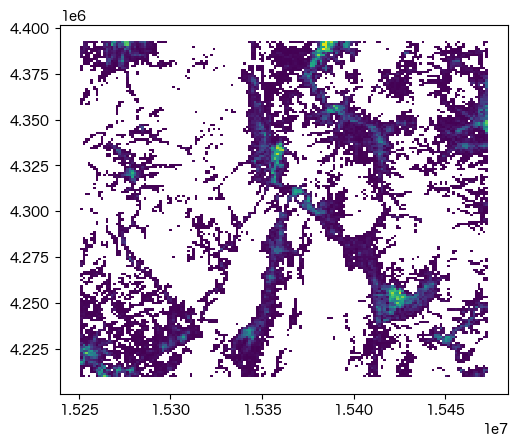

In [36]:
# make a quick plot
naganomesh.plot(column='T001100001')

Text(0.5, 1.0, '18歳以上人口女')

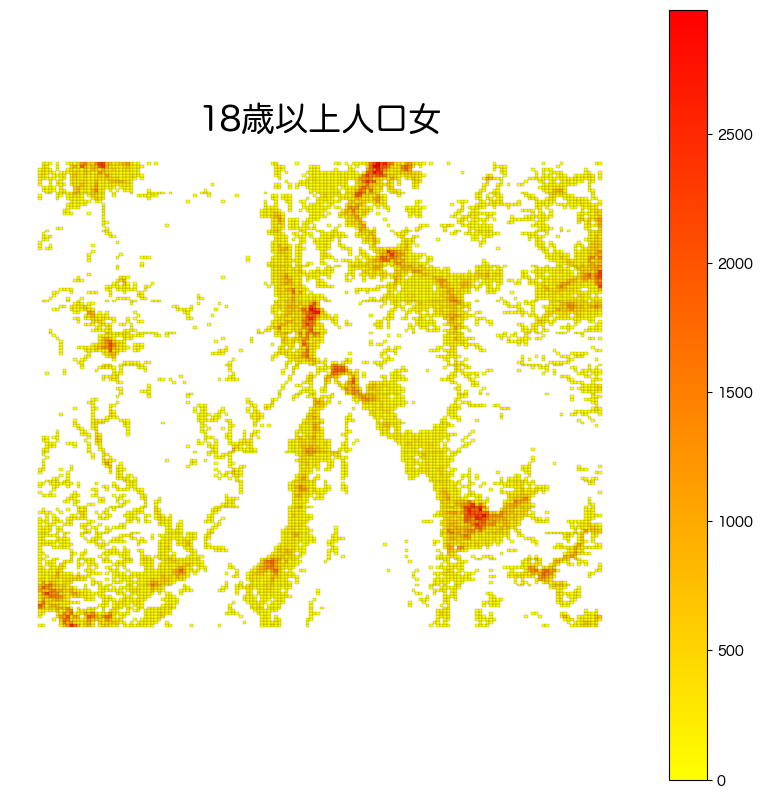

In [37]:
#mapstory
ax = naganomesh.plot(figsize=(10,10),
         column='T001100015',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1)

# hide axes
ax.axis('off')

# title
ax.set_title('18歳以上人口女',fontsize=24)